## Observations and Insights

## Dependencies and starter code

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import stats


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_combined = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer')
mouse_study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_group = mouse_study_combined.groupby('Drug Regimen')
volume_group = study_group['Tumor Volume (mm3)'].describe()
volume_group['SEM'] =study_group.sem()['Tumor Volume (mm3)']
volume_group["Median"] =study_group.median()["Tumor Volume (mm3)"]
volume_group["Variance"] =study_group.var()["Tumor Volume (mm3)"]

volume_group



,count,mean,std,min,25%,50%,75%,max,SEM,Median,Variance
Drug Regimen,,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346,41.557809,24.947764
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821,51.776157,39.290177
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236,51.820584,43.128684
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860,53.698743,68.553577
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466,52.509285,66.173479
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331,52.288934,61.168083
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421,0.512884,50.854632,42.351070
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955,40.673236,23.486704
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111,52.431737,59.450562



## Bar plots

Text(0, 0.5, 'Number of Tests')

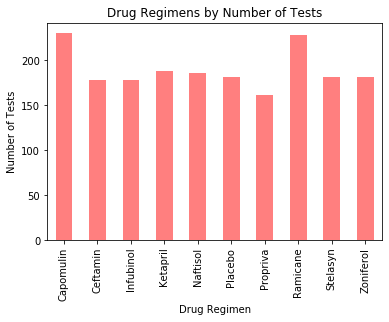

In [71]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
panda_plot = volume_group['count'].plot(kind='bar',facecolor='red',alpha=0.5,title='Drug Regimens by Number of Tests')
panda_plot.set_ylabel('Number of Tests')


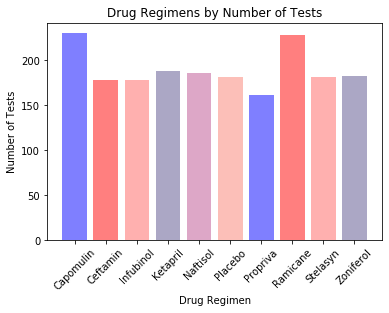

In [79]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(volume_group))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, volume_group['count'], color=('b','r','#ff6361','#58508d','#bc5090','salmon'), alpha=0.5, align="center",)
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation=45)
plt.title("Drug Regimens by Number of Tests")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Tests')
plt.show()

## Pie plots

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


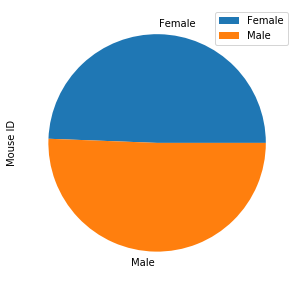

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = mouse_study_combined.groupby('Sex').count()
gender_group

gender_group_plot = gender_group.plot.pie(y='Mouse ID',figsize=(5,5))

gender_group

Text(0.5, 1.0, 'Mice by Gender')

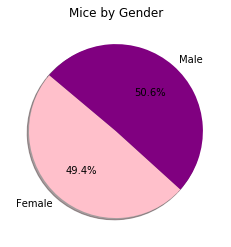

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ['Female','Male']
colors = ['Pink','Purple']
sex_count = [935, 958]
plt.pie(sex_count, labels=sex, colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("Mice by Gender")



## Quartiles, outliers and boxplots

NormaltestResult(statistic=1.7533453484403934, pvalue=0.4161653281562233)
              count       mean       std        min        25%        50%  \
Drug Regimen                                                                
Ramicane      228.0  40.216745  4.846308  22.050126  36.674635  40.673236   
Capomulin     230.0  40.675741  4.994774  23.343598  37.685933  41.557809   
Propriva      161.0  52.322552  6.507770  45.000000  47.081086  50.854632   
Ceftamin      178.0  52.591172  6.268188  45.000000  47.208427  51.776157   

                    75%        max       SEM     Median   Variance  
Drug Regimen                                                        
Ramicane      45.000000  47.622816  0.320955  40.673236  23.486704  
Capomulin     45.000000  48.158209  0.329346  41.557809  24.947764  
Propriva      56.184664  72.455421  0.512884  50.854632  42.351070  
Ceftamin      56.801438  68.923185  0.469821  51.776157  39.290177  
The lower quartile of final tumor size is: 37.289

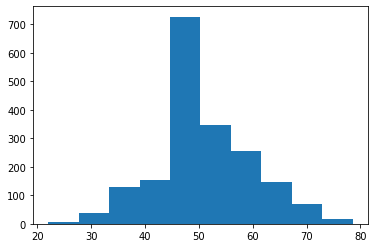

In [77]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Finding if the dataset is normal so we can use mean to find the most promising regimens
volume_size = mouse_study_combined["Tumor Volume (mm3)"]
plt.hist(volume_size)
print(sts.normaltest(volume_size.sample(100)))

#Finding the 4 most promising treatments by finding the smallest mean
top_performing = volume_group.sort_values('mean',ascending=False).nsmallest(4, "mean")
print(top_performing)

Drugs = ['Ramicane', 'Capomulin', 'Propriva', 'Ceftamin']  

top_drugs = mouse_study_combined.loc[(mouse_study_combined['Drug Regimen'] == "Ramicane") | (mouse_study_combined['Drug Regimen'] == "Capomulin")|
                              (mouse_study_combined['Drug Regimen'] == "Propriva")|(mouse_study_combined['Drug Regimen'] == "Ceftamin")]
top_drugs


top_drugs_grouped = top_drugs.groupby(["Mouse ID"])

#creating a new dataframe that has the mouse ID and their max timpoint
timepoint_max = top_drugs_grouped['Timepoint'].max()
timepoint_max

#merging the max timepoint dataframe with my original dataframe with the top 4 treatment drugs
merged_df = pd.merge(top_drugs,timepoint_max,on='Mouse ID',how='outer')
merged_df

#pulling out the rows where the mouse's timepoint equals the max
top_drugs_max = merged_df.loc[(merged_df["Timepoint_x"] == merged_df["Timepoint_y"])]

#final tumor volume of each mouse across four of the most promising treatment regimens
final_tumor_df = top_drugs_max[['Mouse ID', 'Tumor Volume (mm3)']]
final_tumor_df

final_tumor_df.set_index('Mouse ID')
        
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

final_tumors = final_tumor_df['Tumor Volume (mm3)']

quartiles = final_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor size is: {lowerq}")
print(f"The upper quartile of final tumor size is: {upperq}")
print(f"The interquartile range of final tumor size is: {iqr}")
print(f"The the median of final tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = final_tumor_df.loc[(final_tumor_df['Tumor Volume (mm3)'] > upper_bound) | (final_tumor_df['Tumor Volume (mm3)'] < lower_bound)]
outliers

print(f"There are {len(outliers)} outliers.")

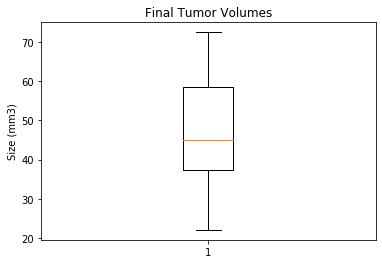

In [63]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumors

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Size (mm3)')
ax1.boxplot(final_tumors)
plt.show()



In [60]:
## Line and scatter plots

Text(0, 0.5, 'Tumor Volume in mm3')

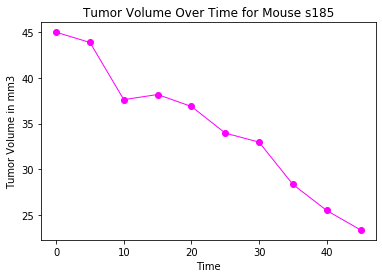

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin = mouse_study_combined.loc[(mouse_study_combined["Drug Regimen"] == "Capomulin") & (mouse_study_combined["Mouse ID"] == "s185")]
capomulin
x_axis = capomulin["Timepoint"]
y_axis = capomulin["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, marker="o", color="magenta", linewidth=1)
# Label and title chart
plt.title("Tumor Volume Over Time for Mouse s185")
plt.xlabel("Time")
plt.ylabel("Tumor Volume in mm3")

Text(0, 0.5, 'Tumor Volume in mm3')

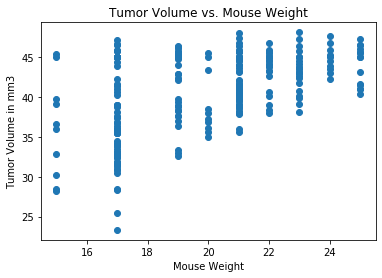

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight = mouse_study_combined[["Drug Regimen", "Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin = mouse_study_combined.loc[(mouse_study_combined["Drug Regimen"] == "Capomulin")]
capomulin
x_axis = capomulin["Weight (g)"]
y_axis = capomulin["Tumor Volume (mm3)"]
#plot
plt.scatter(x_axis, y_axis, marker="o") 
# Label and title chart
plt.title("Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume in mm3")




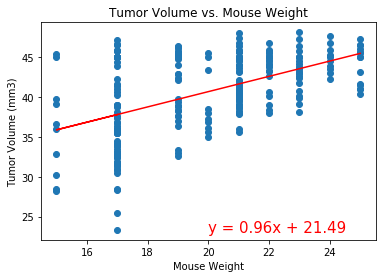

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Determine Values
x_values = capomulin["Weight (g)"]
y_values = capomulin["Tumor Volume (mm3)"]

#Determine line regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Get line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot details
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,23),fontsize=15,color="red")
plt.title("Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


